## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [8]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    elif re.search('Dr', line):
        return 'Dr'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [9]:
data[data.title == 'Other']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62,C,NaN,124,"New York, NY",Other
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France",Other
45,1,0,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",Other
81,1,0,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,NaN,269,"Milwaukee, WI",Other
136,1,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,B,NaN,"Washington, DC",Other
218,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,8,NaN,NaN,Other
231,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,6,NaN,"Toronto, ON",Other
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,NaN,NaN,"Rotterdam, Netherlands",Other
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S,8,NaN,"London Vancouver, BC",Other
255,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,NaN,Other


In [10]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [11]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [12]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [13]:
data.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

## Data Exploration

### Find numerical and categorical variables

In [14]:
target = 'survived'

In [15]:
vars_cat = [var for var in data.columns if data[var].dtypes == 'O']# fill your code here

vars_num = [var for var in data.columns if data[var].dtypes != 'O']# fill your code here

print(vars_num, 'Number of numerical variables: {}'.format(len(vars_num)))
print(vars_cat, 'Number of categorical variables: {}'.format(len(vars_cat)))

['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare'] Number of numerical variables: 6
['sex', 'cabin', 'embarked', 'title'] Number of categorical variables: 4


### Find missing values in variables

In [16]:
# first in numerical variables
vars_with_na = [
    var for var in vars_num
    if data[var].isnull().sum() > 0
]
vars_with_na

['age', 'fare']

In [17]:
data[vars_with_na].isnull().sum()

age     263
fare      1
dtype: int64

In [18]:
# now in categorical variables

vars_with_na = [
    var for var in vars_cat
    if data[var].isnull().sum() > 0
]
vars_with_na

['cabin', 'embarked']

In [19]:
data[vars_with_na].isnull().sum()

cabin       1014
embarked       2
dtype: int64

### Determine cardinality of categorical variables

In [20]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         6
dtype: int64

### Determine the distribution of numerical variables

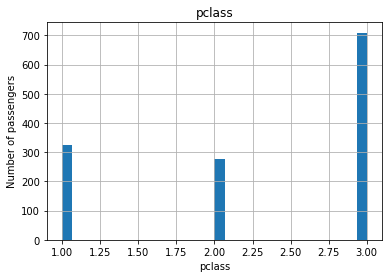

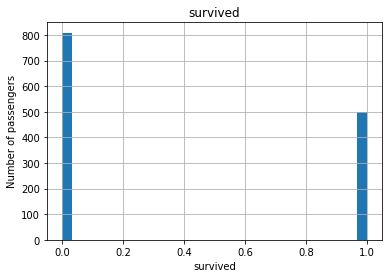

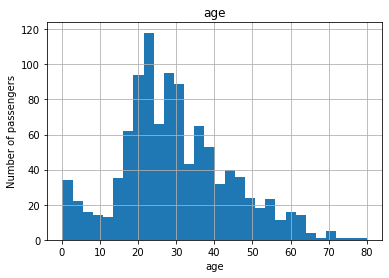

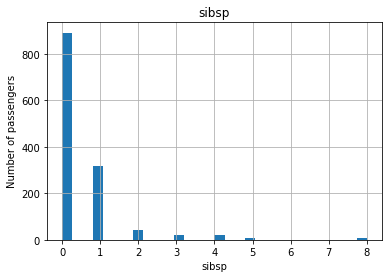

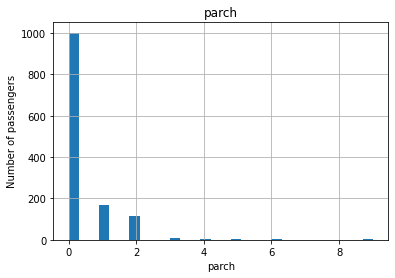

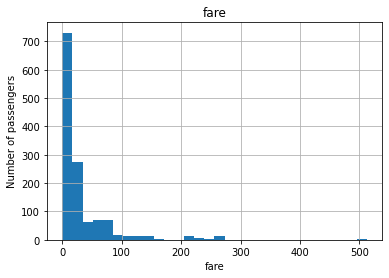

In [21]:
def analyse_continuous(df, var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel('Number of passengers')
    plt.xlabel(var)
    plt.title(var)
    plt.show()


for var in vars_num:
    analyse_continuous(data, var)

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [23]:
def split_cabin(s):
    try:
        return re.split('(\d+)', s)[0]
    except TypeError:
        return s

In [24]:
X_test["cabin"] = X_test["cabin"].apply(split_cabin)
X_train["cabin"] = X_train["cabin"].apply(split_cabin)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [25]:
vars_with_na = [var for var in vars_num if var != 'survived' and X_train[var].isnull().sum() > 0]
vars_with_na

['age', 'fare']

In [26]:
for var in vars_with_na:

    # calculate the mean using the train set
    median_val = X_train[var].median()

    # add binary missing indicator (in train and test)
    X_train[var+'_na'] = np.where(X_train[var].isnull(), 1, 0)
    X_test[var+'_na'] = np.where(X_test[var].isnull(), 1, 0)

    # replace missing values by the mode
    # (in train and test)
    X_train[var] = X_train[var].fillna(median_val)
    X_test[var] = X_test[var].fillna(median_val)

In [27]:
X_train[vars_with_na].isnull().sum()

age     0
fare    0
dtype: int64

In [28]:
X_train[X_train.fare_na == 1].fare.unique()

array([14.4542])

In [29]:
X_train["age"] = np.log(X_train["age"])
X_test["age"] = np.log(X_test["age"])

### Replace Missing data in categorical variables with the string **Missing**

In [30]:
vars_with_na = [var for var in vars_cat if X_train[var].isnull().sum() > 0]

X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [33]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var).count() / len(df)
    return tmp[tmp > rare_perc].index

In [34]:
for var in vars_cat:
    print(find_frequent_labels(X_train, var, 0.05))

Index(['female', 'male'], dtype='object', name='sex')
Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Missing', 'T'], dtype='object', name='cabin')
Index(['C', 'Missing', 'Q', 'S'], dtype='object', name='embarked')
Index(['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype='object', name='title')


In [35]:
for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [36]:
X_train = pd.get_dummies(X_train, columns=vars_cat + ['pclass'], drop_first=True)

In [37]:
X_test = pd.get_dummies(X_test, columns=vars_cat + ['pclass'], drop_first=True)

Test set does not contain samples of some of the options, so need to add these columns to be able to use the scaler later

In [38]:
set(X_train.columns) - set(X_test.columns)

{'cabin_T', 'embarked_Missing', 'title_Master'}

In [39]:
set(X_test.columns) - set(X_train.columns)

set()

In [40]:
for col in (set(X_train.columns) - set(X_test.columns)):
    X_test[col] = 0

In [41]:
set(X_train.columns) - set(X_test.columns)

set()

Reoder the columns in test set to those in training set:

In [42]:
X_test = X_test[X_train.columns]

### Scale the variables

- Use the standard scaler from Scikit-learn

In [43]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
X_train = pd.DataFrame(scaler.transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test.values), columns=X_test.columns, index=X_test.index)

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [45]:
clf = LogisticRegression(random_state=0, C=0.0005).fit(X_train.values, y_train)

In [46]:
clf.score(X_train, y_train)

0.7153772683858644

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [47]:
from sklearn.metrics import roc_curve, auc

In [48]:
y_score = clf.decision_function(X_test)
# Compute ROC curve and ROC area for each class

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

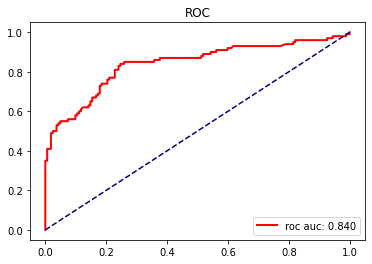

In [49]:
plt.figure()
plt.plot(fpr, tpr, color='red', label='roc auc: %0.3f' % roc_auc, lw=2)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

In [50]:
clf.score(X_test, y_test)

0.7061068702290076

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**